$$ 
\Large \underline{\textbf{Problema 7}}
$$

La fuerza efectiva que realiza el viento sobre el mástil de un bote de velas puede aproximarse por la siguiente
expresión:

$$ \large
\begin{equation}
F=\int \limits_{0}^{30}200\frac{z}{5+z}e^{-2\ z\ /\ 30}dz
\end{equation}
$$

donde F está dada en lbs y las distancias en pies. Estime, utilizando los métodos de trapecios, de Simpson 1/3
y cuadraturas de Gauss, cuánto vale la fuerza total y dónde será el punto de acción efectiva de esta fuerza

$$ \large
\begin{equation}
d=\int \limits_{0}^{30}z\ f(z)\ dz
\end{equation}
$$

Utilice varios tamaños de paso de integración, entre 5 y 0.05 pies, y estudie la convergencia de cada método.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 0
b = 30
p = 200  # pasos de integración

$ \large \textbf
{Método de Trapecios}
$

In [3]:
def trapecios(p, a=0, b=30):
    x = np.linspace(a, b, p)
    sum = []
    f = 0
    for i, xi in enumerate(x[1:-1]):
        f += 200*xi/(5+xi)*np.exp(-2*xi/30)
        sum.append(f)
    fo = 200*a/(5+a)*np.exp(-2*a/30)
    fn = 200*b/(5+b)*np.exp(-2*b/30)
    IL = (b-a)/p*1/2*(fo+2*sum[-1]+fn)
    return IL

In [4]:
trapecios(p)

1473.0875638884484

Genero un vector equidistante en resultados de logaritmo, y me devuelve esos valores como exponente de la base del logaritmo

$ \large \textbf
{Método de Simpsons 1/3}
$

In [5]:
def simpsons(p, a=0, b=30):
    x = np.linspace(a, b, p)
    sum = []
    fpar = 0
    fimp = 0
    for i, xi in enumerate(x[1:-1]):
        if i % 2 == 0:
            fpar += 200*xi/(5+xi)*np.exp(-2*xi/30)
            sum.append(fpar)
        elif i % 2 == 1:
            fimp += 200*xi/(5+xi)*np.exp(-2*xi/30)
    fo = 200*a/(5+a)*np.exp(-2*a/30)
    fn = 200*b/(5+b)*np.exp(-2*b/30)
    IS = (b-a)/(p-1)*1/3*(fo+4*fpar+2*fimp+fn)
    return IS

In [6]:
simpsons(p)

1479.3971559251793

In [7]:
nint = np.logspace(1, 5, 100).astype(int)  # convierto los valores en enteros con astype
IL = [trapecios(p) for p in nint]  # Creo una lista con los valores de las integrales resueltas en p pasos
IS = [simpsons(p) for p in nint]
el = np.abs((IL[:-1]-IL[-1])/IL[-1])  # Calculo el error relativo en cada integral resuelta en p pasos, excepto IL[-1] porque daría 0
es = np.abs((IS[:-1]-IS[-1])/IS[-1])

Text(0.5, 1.0, 'Error relativo en método de Trapecios y Simpsons 1/3')

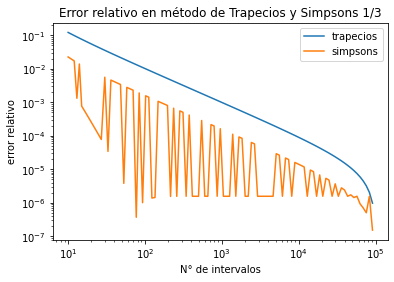

In [8]:
plt.loglog(nint[:-1], el, label='trapecios')  # Gráfico logaritmos de absisas y ordenadas
plt.loglog(nint[:-1], es, label='simpsons')
plt.legend(loc='upper right')
plt.xlabel('N° de intervalos')
plt.ylabel('error relativo')
plt.title('Error relativo en método de Trapecios y Simpsons 1/3')

$ \large \textbf
{Método de Gauss}
$

In [9]:
c = [1, 1]
t = [-1/(3**(1/2)), 1/(3**(1/2))]
xt = []  # x en función de t
sum = 0
for i, ti in enumerate(t):
    xt.append((b-a)/2*ti+(b+a)/2)
    sum += c[i]*200*xt[i]/(5+xt[i])*np.exp(-2*xt[i]/30)
IG = (b-a)/2*sum
print(IG)

1610.5722652945797
